<a href="https://colab.research.google.com/github/Hatsuhinode/ML-Algorithm/blob/main/Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import urllib
import tarfile

In [ ]:
download_root="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_path=os.path.join("data","house")
housing_url=download_root+"datasets/housing/housing.tgz"

In [ ]:
def fetch_housing_data(h_url=housing_url,h_path=housing_path):
  os.makedirs(h_path,exist_ok=True)
  tgz_path=os.path.join(h_path,"house.tgz")
  urllib.request.urlretrieve(h_url,tgz_path)
  housing_tgz=tarfile.open(tgz_path)
  housing_tgz.extractall(path=h_path)
  housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

In [ ]:
def load_housing_data(h_path=housing_path):
  csv_path=os.path.join(housing_path,"housing.csv")
  return pd.read_csv(csv_path)

In [ ]:
housing=load_housing_data()

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


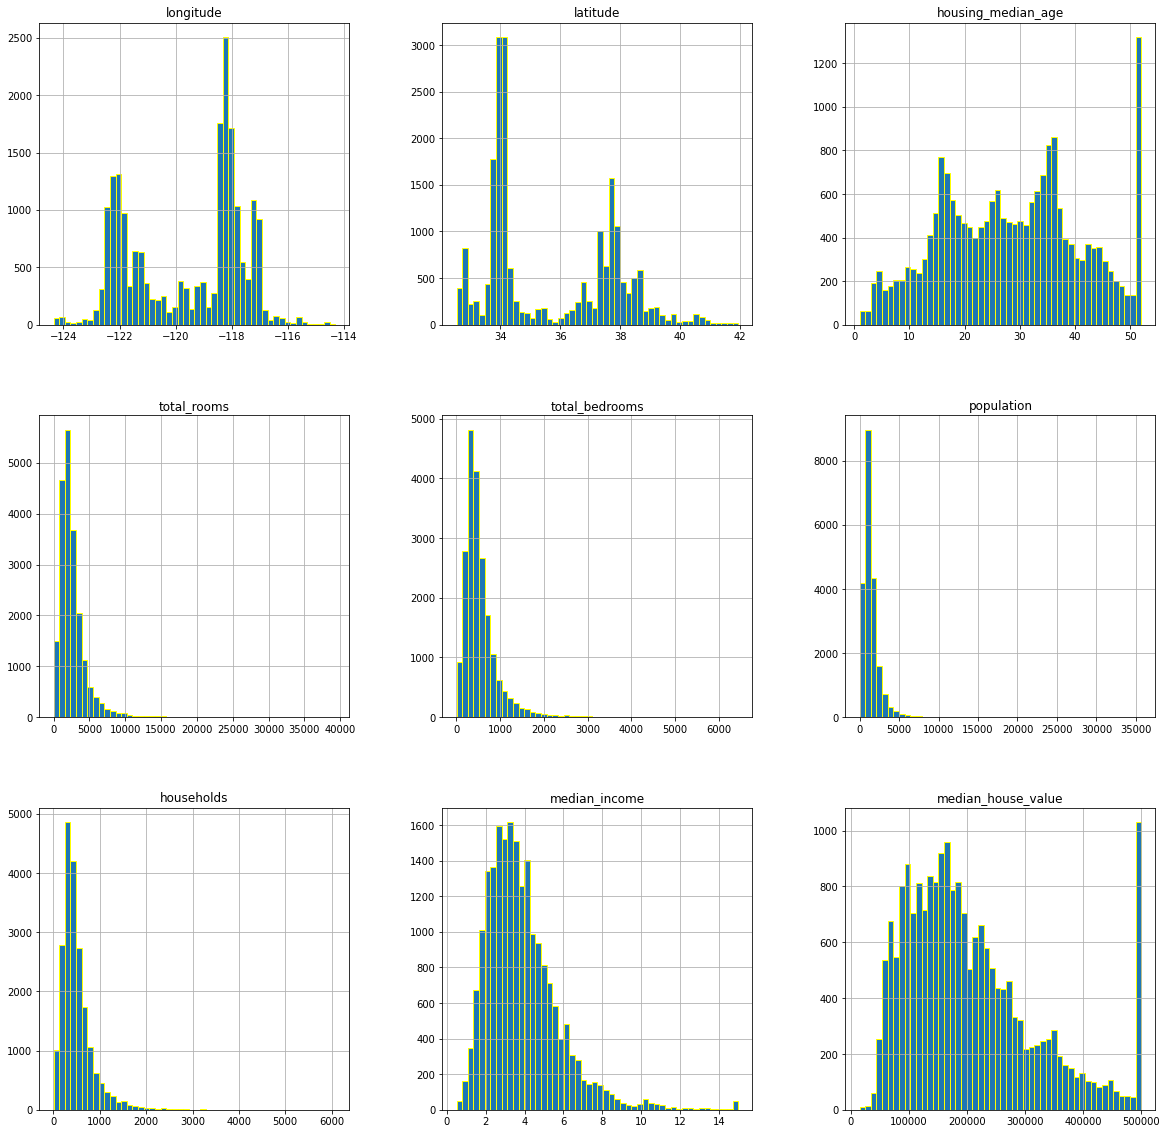

In [ ]:
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,20),edgecolor='yellow')
plt.show()

In [ ]:
import numpy as np
np.random.permutation(len(housing))

array([17738,  2603, 17650, ..., 10879, 12844, 13747])

In [ ]:
housing['income_cat']=pd.cut(housing['median_income'],
       bins=[0.,1.5,3.0,4.5,6.0,np.inf],
       labels=[1,2,3,4,5])

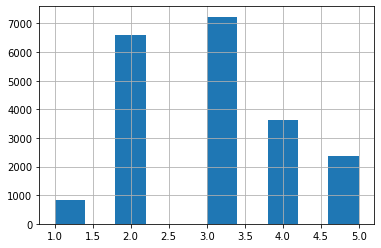

In [ ]:
housing['income_cat'].hist()
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
# n_split indicates the number of times data needs to be resuffled/sampled in the proportion specified by test_split

for train_index,test_index in split.split(housing,housing['income_cat']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]


In [ ]:
len(strat_test_set)

4128

In [ ]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [ ]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [ ]:
for set in (strat_test_set,strat_train_set):
  set.drop('income_cat',axis=1,inplace=True)

In [ ]:
housing=strat_train_set.copy()

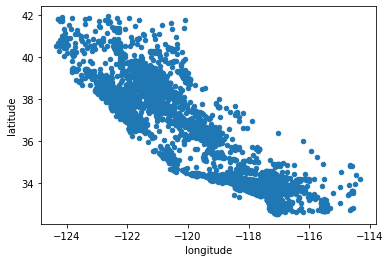

In [ ]:
housing.plot(kind='scatter',x='longitude',y='latitude');

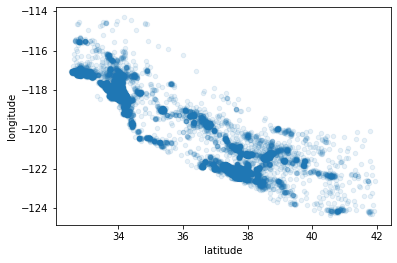

In [ ]:
housing.plot(kind="scatter",x="latitude",y="longitude",alpha=0.1);

# Settiing alpha=0.1 makes it easier to visualize the places where there is high density of data points.

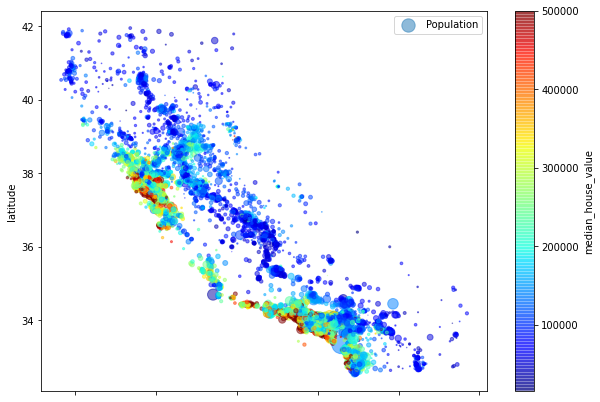

In [ ]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.5,
             s=housing["population"]/100,
             label="Population",
             figsize=(10,7),
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend();

In [ ]:
corr_matrix=housing.corr()

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

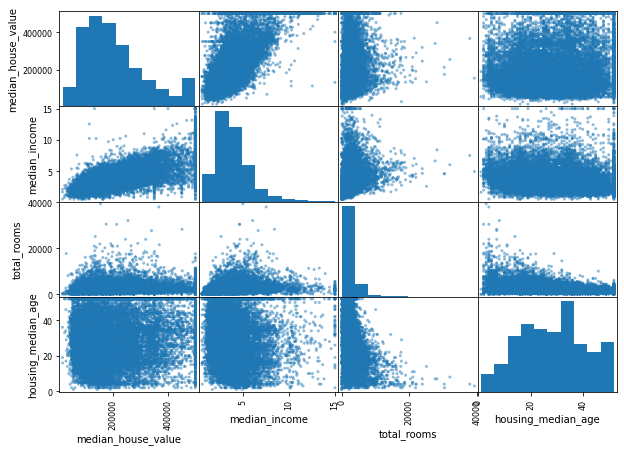

In [ ]:
from pandas.plotting import scatter_matrix
# Visualizating correlation between numerical attributes.

attributes=['median_house_value','median_income','total_rooms','housing_median_age']

scatter_matrix(housing[attributes],figsize=(10,7));

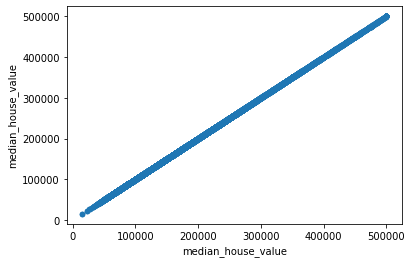

In [ ]:
housing.plot(kind="scatter",x='median_house_value',y='median_house_value');

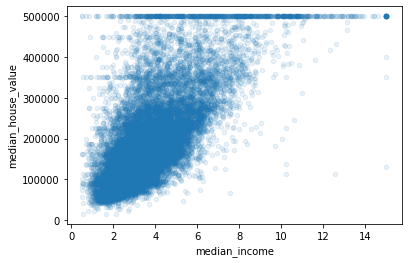

In [ ]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1);

# Experimenting with atttribute combination

In [ ]:
housing['rooms_per_household']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

In [ ]:
corr_matrix=housing.corr()

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

# Preparing data for machine learning algorithm

In [ ]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

### Working with missing values in total_bedrooms attributes

In [ ]:
#option1
#housing.dropna(subset=['total_bedrooms'])

#option2
#housing.drop('total_bedrooms',axis=1)

#option3
median=housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median,inplace=True)

### Handling missing values

In [ ]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

In [ ]:
housing_num=housing.drop('ocean_proximity',axis=1)

In [ ]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [ ]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [ ]:
X=imputer.transform(housing_num)

In [ ]:
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

In [ ]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


# Handling text and categorical attributes

In [ ]:
housing_cat=housing[['ocean_proximity']]

In [ ]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


### Converting categories from text to numbers

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### One hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder()
housing_cat_1hot=one_hot_encoder.fit_transform(housing_cat)
housing_cat_1hot

# Output is SciPy sparse matrix instead of Numpy array

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6

In [ ]:
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self,add_bedrooms_per_room=True):
    self.add_bedrooms_per_room=add_bedrooms_per_room

  def fit(self,X,y=None):
    return self

  def transform(self,X,y=None):
    rooms_per_household=X[:,rooms_ix] / X[:,households_ix]
    population_per_household=X[:,population_ix] / X[:,households_ix]

    if self.add_bedrooms_per_room :
      bedrooms_per_room=X[:,bedrooms_ix] / X[:,rooms_ix]

      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]

    else:
      return np.c_[X, rooms_per_household, population_per_household]

In [ ]:
attr_adder=CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

In [ ]:
pd.DataFrame(housing_extra_attribs)

,0,1,2,3,4,5,6,7,8,9,10
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
4,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241
...,...,...,...,...,...,...,...,...,...,...,...
16507,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.09,<1H OCEAN,6.658342,2.023976
16508,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,INLAND,5.571932,3.363188
16509,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,<1H OCEAN,4.110465,2.662791
16510,-122.7,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,<1H OCEAN,6.297405,2.411178


# Transformation Pipelines

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_attribute_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('attr_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])

In [ ]:
housing_num_tr=num_attribute_pipeline.fit_transform(housing_num)

# Single transformer able to handle all columns(numerical attributes and categorcal attributes)

In [ ]:
from joblib import numpy_pickle
from sklearn.compose import ColumnTransformer

numerical_attribs=list(housing_num)
cat_attribs=['ocean_proximity']

full_pipeline=ColumnTransformer([
    ('num',num_attribute_pipeline,numerical_attribs),
    ('cat',OneHotEncoder(),cat_attribs),
])

In [ ]:
housing_prepared=full_pipeline.fit_transform(housing)

# Selecting and training a model

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [ ]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_data_prepared=full_pipeline.transform(some_data)
print("Predictions:",lin_reg.predict(some_data_prepared))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [ ]:
print("Labels:",list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [ ]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse


68627.87390018745

# Trying another model

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_labels)

DecisionTreeRegressor()

In [ ]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_labels,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
some_data_prepared=full_pipeline.transform(some_data)
print("Predictions:",tree_reg.predict(some_data_prepared))

Predictions: [ 72100. 279600.  82700. 112500. 238300.]


In [ ]:
print("Labels:",list(some_labels))

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


# Better evaluation using cross-validation

In [ ]:
#Randomly splitting the training set into 10 distinct subsets called folds
#It trains and evaluates Decision
# Tree model 10 times
#picking a different folds for evaluation every time and training on other 9 folds
# The result is an array containing 10 evaluation scores

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores=np.sqrt(-scores)


Scikit-Learn’s cross-validation features expect a utility function (greater is better) rather than a cost function (lower is better), so the scoring function is actually the opposite of
the MSE (i.e., a negative value), which is why the preceding code computes before calculating the square root.

In [ ]:
def display_scores(scores):
  print("Scores:",scores)
  print("Mean:",scores.mean())
  print("Standard deviation:",scores.std())

In [ ]:
display_scores(tree_rmse_scores)

Scores: [73269.7560111  69512.71260858 69712.40751317 70919.50873695
 69530.73144955 77473.98565085 70523.05030549 73625.1849483
 68173.05051584 70543.76957409]
Mean: 71328.41573139062
Standard deviation: 2594.9899297692987


Computing the same scores for the Linear Regression model

In [ ]:
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_score=np.sqrt(-lin_scores)

In [ ]:
display_scores(lin_rmse_score)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180634


# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [ ]:
forest_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_labels,forest_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

18667.531508103275

In [ ]:
forest_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
forest_rmse_scores=np.sqrt(-forest_scores)

In [ ]:
display_scores(forest_rmse_scores)

Scores: [51613.55429305 48929.48065623 46668.77373777 51834.13958581
 47698.80027718 51715.50473089 52311.04391678 49929.47990245
 48416.39817485 53671.12513771]
Mean: 50278.83004127002
Standard deviation: 2168.0076537243463


# Fine tuning your model

### Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid=[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

In [ ]:
forest_reg=RandomForestRegressor()
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
# Getting best combination of parameters.

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [ ]:
# Get best estimator

grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

If GridSearchCV is initialized with refit=True (which is the default), then once it finds the best estimator using cross-validation, it retrains it on the whole training set. This is usually a good idea, since feeding it more data will likely improve its performance.

In [ ]:
# Evaluation scores

cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
  print(np.sqrt(-mean_score),params)

64853.43243511621 {'max_features': 2, 'n_estimators': 3}
55500.22798319507 {'max_features': 2, 'n_estimators': 10}
52814.87370247597 {'max_features': 2, 'n_estimators': 30}
59803.995369561155 {'max_features': 4, 'n_estimators': 3}
52704.151436000735 {'max_features': 4, 'n_estimators': 10}
50189.76827710282 {'max_features': 4, 'n_estimators': 30}
59092.53287983435 {'max_features': 6, 'n_estimators': 3}
52328.30321442889 {'max_features': 6, 'n_estimators': 10}
50096.57588284049 {'max_features': 6, 'n_estimators': 30}
59187.96526624505 {'max_features': 8, 'n_estimators': 3}
51845.71364174591 {'max_features': 8, 'n_estimators': 10}
50083.31586803136 {'max_features': 8, 'n_estimators': 30}
63280.7773841528 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54302.19235181285 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59861.05928635445 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52255.22141010001 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

Don’t forget that you can treat some of the data preparation steps as hyperparameters. For example, the grid search will automatically find out whether or not to add a feature you
were not sure about (e.g., using the *add_bedrooms_per_room* hyperparameter of your *CombinedAttributesAdder*
transformer). It may similarly be used to automatically find the best way to handle outliers, missing features, feature selection, and more.

## Randomized Search
It evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration.

## Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors.

# Evaluate your system in test set

Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and
the labels from your test set, run your to transform the data
(call , not —you do not want to fit the test set!), and evaluate the final model on the test set.


In [ ]:
final_model=grid_search.best_estimator_

In [ ]:
X_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()

X_test_prepared=full_pipeline.transform(X_test)
final_predictions=final_model.predict(X_test_prepared)

In [ ]:
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
final_rmse

47876.037170616095

In some cases, such a point estimate of the generalization error will not be quite enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is. For this, you can compute a 95% *confidence interval* for the
generalization error using *scipy.stats.t.interval()*:

In [ ]:
from scipy import stats

In [ ]:
confidence=0.95
squared_errors=(final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence,len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45913.4373436 , 49761.29159919])

In [ ]:
len(squared_errors)

4128

If you did a lot of hyperparameter tuning, the performance will usually be slightly worse than what you measured using cross-validation (because your system ends up fine-tuned to perform well on the validation data and will likely not perform as well on unknown datasets). It is not the case in this example, but when this happens you must resist the temptation to tweak the hyperparameters to make the numbers look good on the test set; the improvements would be unlikely to generalize to new data.